In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from datasets import load_metric
from concurrent.futures import ThreadPoolExecutor, as_completed

In [2]:
news_data = pd.read_csv('data.csv')
user_ratings = pd.read_csv('rating.csv')
raw_news = pd.read_csv('raw-data.csv')

/var/folders/l_/_xmhpvtx7lldzzqd9tqcmdzr0000gn/T/ipykernel_28981/3619700105.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_news = pd.read_csv('raw-data.csv')


In [3]:
news_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


In [4]:
user_ratings.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [5]:
raw_news.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category
0,594424,NaN,Forbes,"Gemma Allen, Contributor, \n Gemma Allen, Cont...","A Twist For Adam Neumann, Sam Altman, And The ...",Adam Neumann the ousted WeWork CEO was again p...,https://www.forbes.com/sites/gemmaallen/2023/1...,https://imageio.forbes.com/specials-images/ima...,2023-11-21 05:11:36.000000,"LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...",Stock
1,594425,NaN,Forbes,"Forbes Vetted Paid Program With Wayfair, Contr...",21 Best Wayfair Deals To Shop During Black Fri...,Wayfair's huge Black Friday event has discount...,https://www.forbes.com/sites/forbes-personal-s...,https://imageio.forbes.com/specials-images/ima...,2023-11-21 14:55:48.000000,This article was created in partnership with W...,Stock
2,594426,NaN,Forbes,"Kari Molvar, Forbes Staff, \n Kari Molvar, For...",The Best Black Friday Jacket Deals To Stay War...,Here are the best Black Friday jacket deals to...,https://www.forbes.com/sites/forbes-personal-s...,https://imageio.forbes.com/specials-images/ima...,2023-11-21 15:39:27.000000,"Temperatures are starting to plummet, which me...",Stock
3,594427,NaN,Slickdeals.net,RobloxAspect,CyberPowerPC - Gamer Supreme Gaming Desktop - ...,*Specs:* \n* AMD Ryzen 9 7900X \n* NVIDIA GeFo...,https://slickdeals.net/f/17086387-cyberpowerpc...,https://static.slickdealscdn.com/attachment/2/...,2023-11-21 14:46:46.000000,The dead Dell Aurora deal was a hit partly due...,Stock
4,594428,NaN,STERN.de,STERN.de,Tod von John F. Kennedy: Das sind die wildeste...,Der Mord an John F. Kennedy rief zahlreiche Ve...,https://www.stern.de/lifestyle/leute/tod-von-j...,https://image.stern.de/34219868/t/YJ/v1/w1440/...,2023-11-21 16:59:00.000000,Der Mord an John F. Kennedy rief zahlreiche Ve...,Stock


In [6]:
news_data['article_id'] = news_data['article_id'].astype(str)
user_ratings['article_id'] = user_ratings['article_id'].astype(str)
raw_news['article_id'] = raw_news['article_id'].astype(str)

In [7]:
news_data = news_data.drop_duplicates(subset=['article_id'])
user_ratings = user_ratings.drop_duplicates(subset=['article_id'])
raw_news = raw_news.drop_duplicates(subset=['article_id'])

In [8]:
concat_df = pd.concat([news_data.set_index('article_id'), user_ratings.set_index('article_id'), raw_news.set_index('article_id')], axis=1)
final_df = concat_df.loc[:, ~concat_df.columns.duplicated()]

In [9]:
final_df

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment
article_id,,,,,,,,,,,,,
89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,un secretary-general antonio guterres urged th...,Neutral
89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,NaN,NaN
89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,NaN,NaN
89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,at least 14 persons lost their lives and more ...,Neutral
89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
columns_to_exclude = [
    'source_id', 'source_name', 'author', 'url', 'url_to_image', 
    'published_at', 'category', 'full_content', 'article', 'title_sentiment'
]

In [11]:
final_df = final_df.drop(columns=columns_to_exclude, errors='ignore')

In [12]:
final_df = final_df.dropna(axis=0, how='any')
final_df = final_df.dropna(axis=1, how='any')

In [13]:
final_df

,title,description,content
article_id,,,
89541,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...
89542,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa..."
89543,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio..."
89545,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...
89547,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ..."
...,...,...,...
781108,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,Karnataka Deputy Chief Minister D K Shivakumar...
781129,FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,FC Barcelona have guaranteed at least $767.6 m...
781235,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",The photo from David and Sarah Lubarsky's wedd...


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [15]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/avinash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/avinash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/avinash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
def text_cleaning(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

In [17]:
def text_tokenization(text):
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]
    return words

In [18]:
def stopwords_removal(words):
    stop_words = set(stopwords.words('english'))
    filtered = [[word for word in sentence if word not in stop_words] for sentence in words]
    return filtered

In [19]:
def stemming(words):
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(word) for word in sentence] for sentence in words]
    return stemmed

In [20]:
def lemmatization(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in words]
    return lemmatized

In [21]:
final_df['clean_text'] = final_df['content'].apply(text_cleaning)
final_df['token_text'] = final_df['clean_text'].apply(text_tokenization)
final_df['filtered_words'] = final_df['token_text'].apply(stopwords_removal)
final_df['stemmed_words'] = final_df['filtered_words'].apply(stemming)
final_df['lemmatized_words'] = final_df['filtered_words'].apply(lemmatization)

In [22]:
final_df

,title,description,content,clean_text,token_text,filtered_words,stemmed_words,lemmatized_words
article_id,,,,,,,,
89541,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,un secretarygeneral antonio guterres urged the...,"[[un, secretarygeneral, antonio, guterres, urg...","[[un, secretarygeneral, antonio, guterres, urg...","[[un, secretarygener, antonio, guterr, urg, wo...","[[un, secretarygeneral, antonio, guterres, urg..."
89542,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",randebooweb autumn winter \nnepal handmade ram...,"[[randebooweb, autumn, winter, nepal, handmade...","[[randebooweb, autumn, winter, nepal, handmade...","[[randebooweb, autumn, winter, nepal, handmad,...","[[randebooweb, autumn, winter, nepal, handmade..."
89543,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio...",kathmandu nepal un secretarygeneral antonio g...,"[[kathmandu, nepal, un, secretarygeneral, anto...","[[kathmandu, nepal, un, secretarygeneral, anto...","[[kathmandu, nepal, un, secretarygener, antoni...","[[kathmandu, nepal, un, secretarygeneral, anto..."
89545,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...,at least persons lost their lives and more th...,"[[at, least, persons, lost, their, lives, and,...","[[least, persons, lost, lives, others, includi...","[[least, person, lost, live, other, includ, ar...","[[least, person, lost, life, others, including..."
89547,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ...",scores of foreign citizens were killed taken h...,"[[scores, of, foreign, citizens, were, killed,...","[[scores, foreign, citizens, killed, taken, ho...","[[score, foreign, citizen, kill, taken, hostag...","[[score, foreign, citizen, killed, taken, host..."
...,...,...,...,...,...,...,...,...
781108,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,Karnataka Deputy Chief Minister D K Shivakumar...,karnataka deputy chief minister d k shivakumar...,"[[karnataka, deputy, chief, minister, d, k, sh...","[[karnataka, deputy, chief, minister, k, shiva...","[[karnataka, deputi, chief, minist, k, shivaku...","[[karnataka, deputy, chief, minister, k, shiva..."
781129,FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,FC Barcelona have guaranteed at least $767.6 m...,fc barcelona have guaranteed at least million...,"[[fc, barcelona, have, guaranteed, at, least, ...","[[fc, barcelona, guaranteed, least, million, c...","[[fc, barcelona, guarante, least, million, cha...","[[fc, barcelona, guaranteed, least, million, c..."
781235,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",The photo from David and Sarah Lubarsky's wedd...,the photo from david and sarah lubarskys weddi...,"[[the, photo, from, david, and, sarah, lubarsk...","[[photo, david, sarah, lubarskys, wedding, ann...","[[photo, david, sarah, lubarski, wed, announc,...","[[photo, david, sarah, lubarskys, wedding, ann..."


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [24]:
final_df['title_len'] = final_df['title'].apply(lambda x: len(x.split()))
final_df['desc_len'] = final_df['description'].apply(lambda x: len(x.split()))
final_df['content_len'] = final_df['content'].apply(lambda x: len(x.split()))

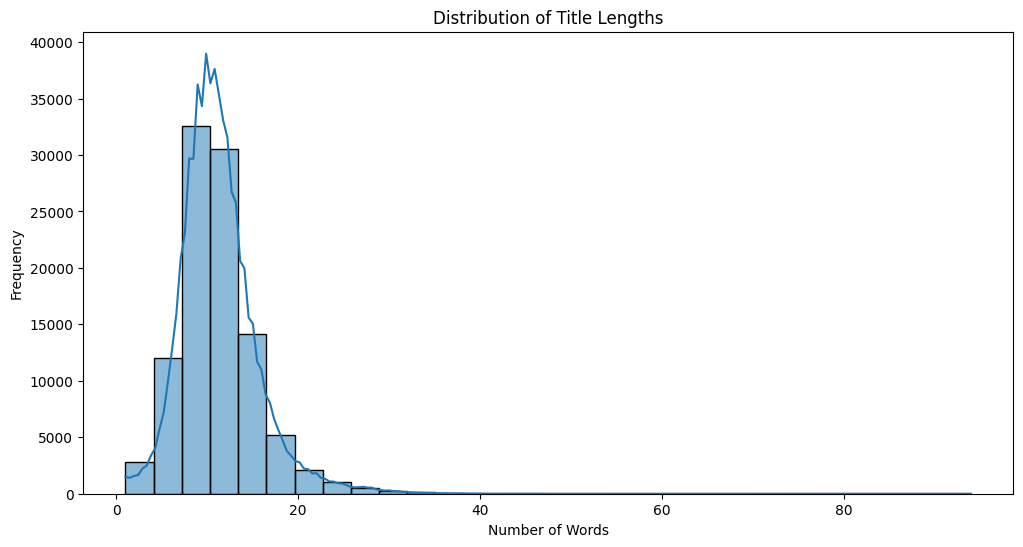

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(final_df['title_len'], kde=True, bins=30)
plt.title('Distribution of Title Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

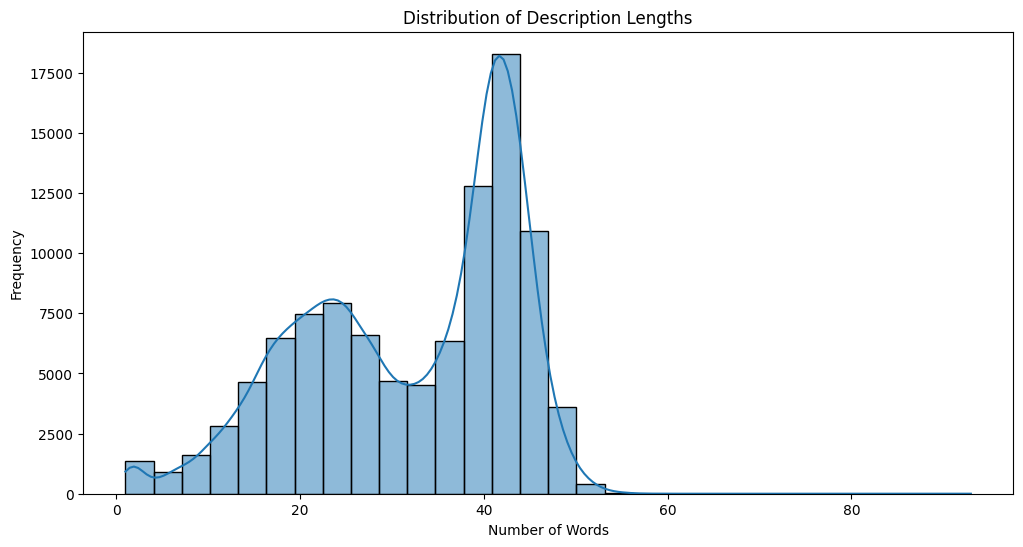

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(final_df['desc_len'], kde=True, bins=30)
plt.title('Distribution of Description Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

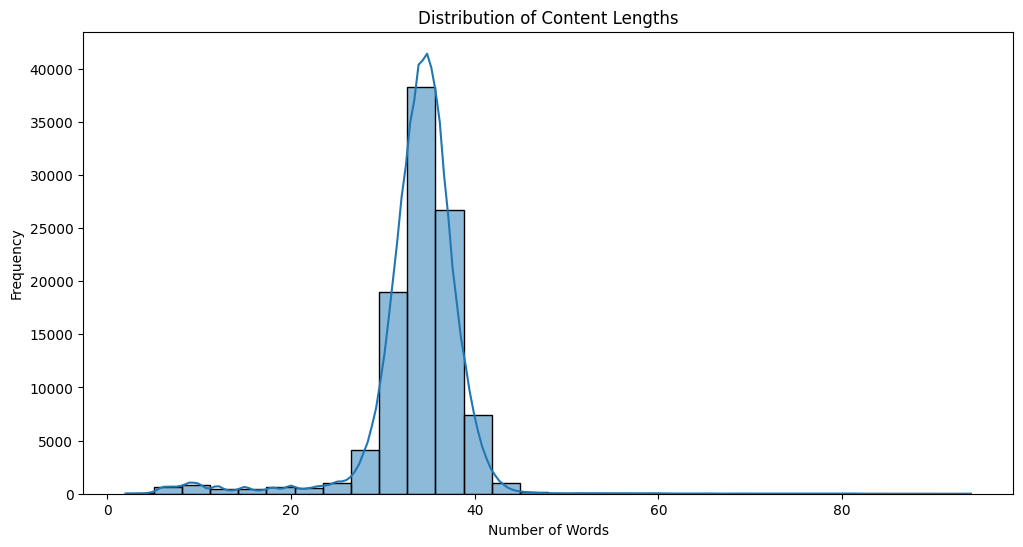

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(final_df['content_len'], kde=True, bins=30)
plt.title('Distribution of Content Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [28]:
all_words = ' '.join(final_df['clean_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

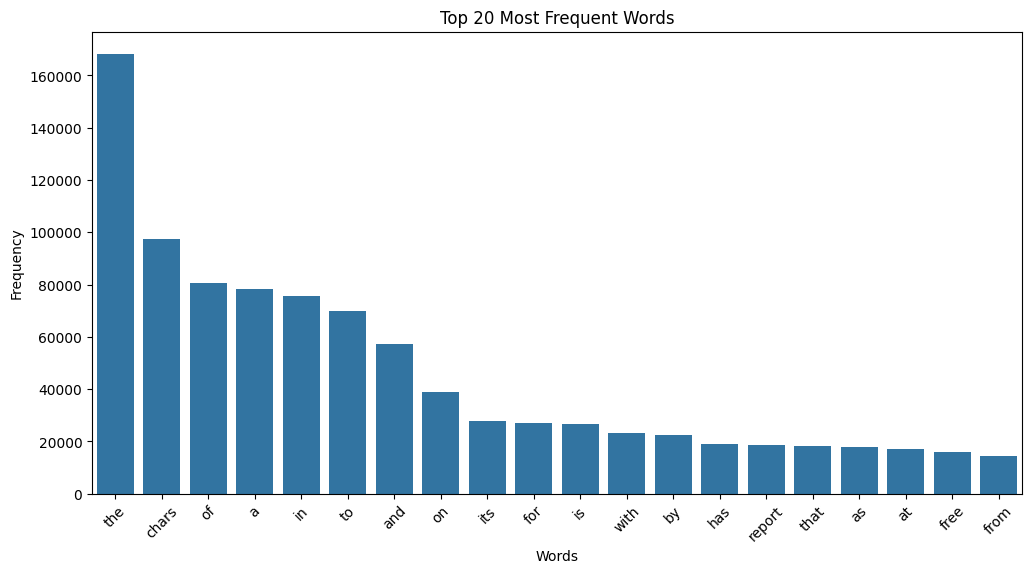

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

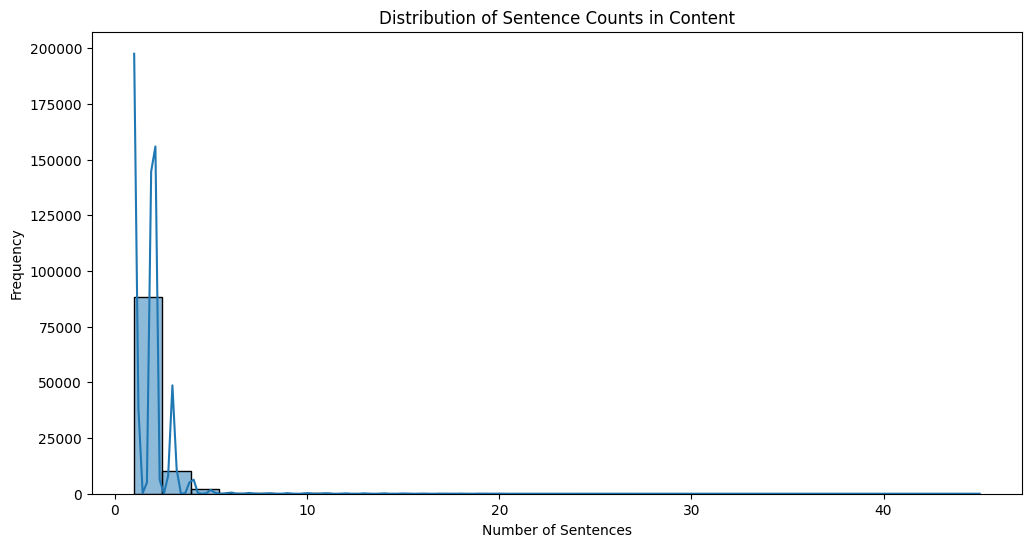

In [30]:
final_df['sentence_cnt'] = final_df['content'].apply(lambda x: len(nltk.sent_tokenize(x)))

plt.figure(figsize=(12, 6))
sns.histplot(final_df['sentence_cnt'], kde=True, bins=30)
plt.title('Distribution of Sentence Counts in Content')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

In [32]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('universal_tagset')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/avinash/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/avinash/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/avinash/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /Users/avinash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/avinash/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [33]:
def extract_keywords(texts, top_n=10):
    vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000, stop_words='english', use_idf=True)
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    keywords = []
    for row in tfidf_matrix:
        row_data = row.toarray().flatten()
        top_indices = row_data.argsort()[-top_n:]
        top_keywords = [feature_names[i] for i in top_indices]
        keywords.append(top_keywords)
    return keywords

In [34]:
def perform_ner(text):
    doc = nlp(text)
    entities = [(X.text, X.label_) for X in doc.ents]
    return entities

In [35]:
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens, tagset='universal')
    return pos_tags

In [37]:
final_df['keywords'] = extract_keywords(final_df['clean_text'])
final_df['named_entities'] = final_df['clean_text'].apply(perform_ner)
final_df['pos_tags'] = final_df['clean_text'].apply(pos_tagging)

In [38]:
final_df

,title,description,content,clean_text,token_text,filtered_words,stemmed_words,lemmatized_words,title_len,desc_len,content_len,sentence_cnt,keywords,named_entities,pos_tags
article_id,,,,,,,,,,,,,,,
89541,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,un secretarygeneral antonio guterres urged the...,"[[un, secretarygeneral, antonio, guterres, urg...","[[un, secretarygeneral, antonio, guterres, urg...","[[un, secretarygener, antonio, guterr, urg, wo...","[[un, secretarygeneral, antonio, guterres, urg...",11,33,31,1,"[rapidly, struggling, visited, witness, antoni...","[(un, ORG), (antonio guterres, PERSON), (monda...","[(un, ADJ), (secretarygeneral, ADJ), (antonio,..."
89542,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",randebooweb autumn winter \nnepal handmade ram...,"[[randebooweb, autumn, winter, nepal, handmade...","[[randebooweb, autumn, winter, nepal, handmade...","[[randebooweb, autumn, winter, nepal, handmad,...","[[randebooweb, autumn, winter, nepal, handmade...",1,12,24,1,"[fate, father, fathers, fatigue, fatal, zurich...","[(autumn winter, DATE), (knitweb\n \n, ORG)]","[(randebooweb, NOUN), (autumn, NOUN), (winter,..."
89543,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio...",kathmandu nepal un secretarygeneral antonio g...,"[[kathmandu, nepal, un, secretarygeneral, anto...","[[kathmandu, nepal, un, secretarygeneral, anto...","[[kathmandu, nepal, un, secretarygener, antoni...","[[kathmandu, nepal, un, secretarygeneral, anto...",11,39,31,1,"[struggling, visited, nepal, antonio, secretar...","[(kathmandu, GPE), (un, ORG), (antonio guterre...","[(kathmandu, NOUN), (nepal, ADJ), (un, ADJ), (..."
89545,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...,at least persons lost their lives and more th...,"[[at, least, persons, lost, their, lives, and,...","[[least, persons, lost, lives, others, includi...","[[least, person, lost, live, other, includ, ar...","[[least, person, lost, life, others, including...",10,30,36,2,"[lost, went, lives, missing, reportedly, river...","[(wednesday, DATE)]","[(at, ADP), (least, ADJ), (persons, NOUN), (lo..."
89547,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ...",scores of foreign citizens were killed taken h...,"[[scores, of, foreign, citizens, were, killed,...","[[scores, foreign, citizens, killed, taken, ho...","[[score, foreign, citizen, kill, taken, hostag...","[[score, foreign, citizen, killed, taken, host...",14,46,36,2,"[taken, missing, citizens, civilians, assault,...","[(hamas, ORG), (israel, GPE), (october, DATE)]","[(scores, NOUN), (of, ADP), (foreign, ADJ), (c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781108,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,Karnataka Deputy Chief Minister D K Shivakumar...,karnataka deputy chief minister d k shivakumar...,"[[karnataka, deputy, chief, minister, d, k, sh...","[[karnataka, deputy, chief, minister, k, shiva...","[[karnataka, deputi, chief, minist, k, shivaku...","[[karnataka, deputy, chief, minister, k, shiva...",16,34,37,1,"[party, did, congress, deputy, claimed, com, f...","[(karnataka, ORG), (d k shivakumar, PERSON), (...","[(karnataka, NOUN), (deputy, NOUN), (chief, AD..."
781129,FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,FC Barcelona have guaranteed at least $767.6 m...,fc barcelona have guaranteed at least million...,"[[fc, barcelona, have, guaranteed, at, least, ...","[[fc, barcelona, guaranteed, leas

In [39]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset, DataLoader

In [40]:
class SummarizationDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=512):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        article = str(self.data.iloc[index].content)
        summary = str(self.data.iloc[index].description)
        
        inputs = self.tokenizer.encode_plus(
            article,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        targets = self.tokenizer.encode_plus(
            summary,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': targets['input_ids'].flatten()
        }

In [41]:
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_size = int(0.8 * len(final_df))
train_dataset = final_df[:train_size]
val_dataset = final_df[train_size:]

train_data = SummarizationDataset(train_dataset, tokenizer)
val_data = SummarizationDataset(val_dataset, tokenizer)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [48]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

In [51]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data
)

trainer.train()

Step,Training Loss
10,0.965500
20,0.948600
30,0.734100
40,0.820500
50,0.957600
60,0.701200
70,0.638100
80,0.606600
90,0.526800
100,0.573400


KeyboardInterrupt: 

In [85]:
def predict_summary(text):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    model.eval()
    with torch.no_grad():
        summary_ids = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=150, num_beams=5, early_stopping=True)
    
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    return summary

In [87]:
sample_data = final_df.sample(10, random_state=1)

predicted_summaries = []
actual_summaries = sample_data['description'].tolist()

for article in sample_data['content']:
    predicted_summaries.append(predict_summary(article))

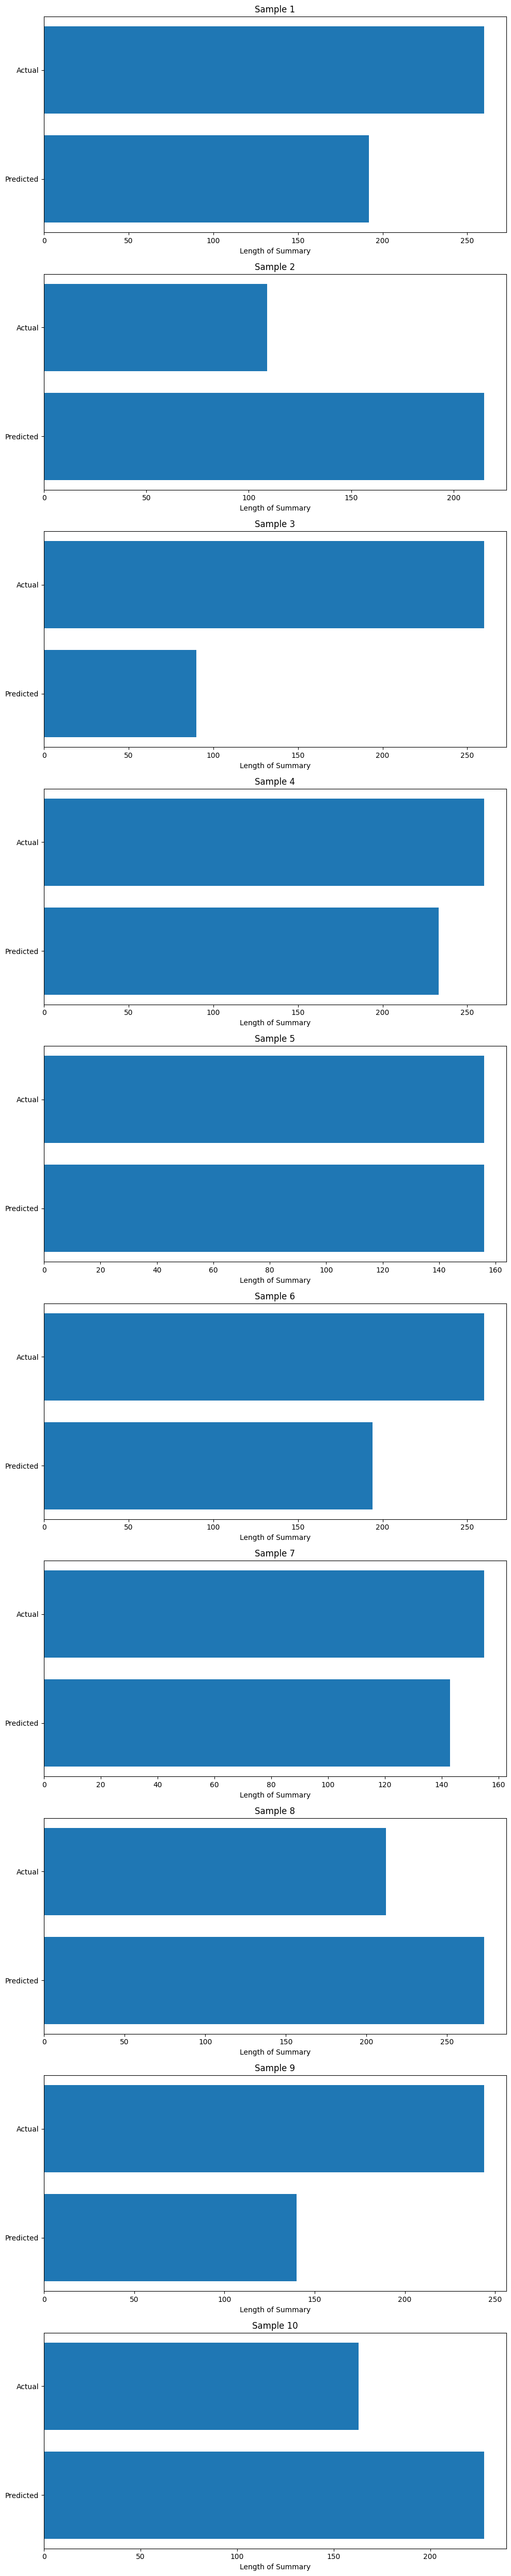

In [88]:
fig, ax = plt.subplots(len(sample_data), 1, figsize=(10, 50))
for i in range(len(sample_data)):
    ax[i].barh(['Predicted', 'Actual'], [len(predicted_summaries[i]), len(actual_summaries[i])])
    ax[i].set_title(f'Sample {i+1}')
    ax[i].set_xlabel('Length of Summary')

plt.tight_layout()
plt.show()

In [91]:
for i in range(len(sample_data)):
    print(f'Sample {i+1}:')
    print('Article:', sample_data.iloc[i]['content'])
    print('Predicted Summary:', predicted_summaries[i])
    print('Actual Summary:', actual_summaries[i])
    print('\n')

Sample 1:
Article: Golden Predator Mining Corp. (CVE:GPY – Get Free Report)’s stock price was down 5.9% during trading on Monday . The stock traded as low as C$0.16 and last traded at C$0.16. Approximately 201,699 shar… [+1146 chars]
Predicted Summary: (CVE:GPY – Get Free Report)’s stock price was down 5.9% during trading on Monday. Golden Predator Mining Corp. (CVE:GPY – Get Free Report)’s stock price was down 5.9% during trading on Monday.
Actual Summary: Golden Predator Mining Corp. (CVE:GPY – Get Free Report)’s stock price was down 5.9% during trading on Monday . The stock traded as low as C$0.16 and last traded at C$0.16. Approximately 201,699 shares changed hands during trading, an increase of 47% from the…


Sample 2:
Article: Those admirers likely didnt find Steinberg online because they were actually looking for her. For some of her viewers, TikToks for you algorithm may have noticed they had liked other dance videos. It… [+5900 chars]
Predicted Summary: for you algorithm. Tho

In [92]:
def predict_summary(text):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    model.eval()
    with torch.no_grad():
        summary_ids = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=150, num_beams=5, early_stopping=True)
    
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    return summary


In [93]:
user_input = input("Please enter the text to summarize: ")

Please enter the text to summarize:  Singapore goalkeeper Hassan Sunny says he has received money from Chinese football fans after his 11 saves against Thailand in a World Cup qualifying match helped China reach the next round.  China's hopes of making the final stage of Asian qualifying for the 2026 tournament were slim following a 1-0 defeat by South Korea in Seoul on Tuesday.  Thailand then needed to beat Singapore by three goals in Bangkok to move second in Group C above China, which would have resulted in China's exit from the competition.  Thailand did defeat bottom side Singapore 3-1, but China progressed thanks to 40-year-old Hassan's multiple saves.  Hassan told Singapore's state broadcaster CNA a picture of a payment QR code from the food stall he runs has been circulated online which fans have then used to transfer money.  "I did enjoy it for a while. I was like, 'oh OK, money coming in'," he said on Thursday.  "But having said that, I was thinking, 'when is this going to st

In [94]:
predicted_summary = predict_summary(user_input)
print("Predicted Summary:", predicted_summary)


Predicted Summary: Hassan Sunny says he has received money from Chinese football fans. his 11 saves against Thailand in a qualifying match helped china reach the next round. his family's stall, Dapur Hassan, has seen many Chinese fans visit since his heroics against Thailand.
